<a href="https://colab.research.google.com/github/irfanrfn/Bank-Customer-Churn/blob/main/Bank_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/bede-nafis/Final-Project/main/Customer_Churn.csv')
df.head()

,CustomerId,Gender,Age,CreditScore,EstimatedSalary,HasCrCard,Exited
0,15634602,Female,42,619,101348.88,1,1
1,15647311,Female,41,608,112542.58,0,0
2,15619304,Female,42,502,113931.57,1,1
3,15701354,Female,39,699,93826.63,0,0
4,15737888,Female,43,850,79084.10,1,0


In [ ]:
df.shape

(10000, 7)

Df memiliki 1000 baris dengan 14 atribut.

Tujuan dari projek ini adalah menggunakan kumpulan data ini untuk memprediksi apakah nasabah bank meninggalkan bank atau tidak. Jika Klien telah menutup rekening banknya, dia telah pergi.
- **CustomerId:** berisi nilai acak dan tidak berpengaruh pada nasabah yang meninggalkan bank.
- **CreditScore:** Dapat berdampak pada churn pelanggan, karena pelanggan dengan skor kredit yang lebih tinggi cenderung meninggalkan bank.
- **Gender:** Suatu hal yang menarik untuk mengeksplorasi apakah jenis kelamin berperan dalam pelanggan meninggalkan bank.
- **Age:** Umur relevan, karena pelanggan yang lebih tua lebih kecil kemungkinannya untuk meninggalkan bank mereka daripada pelanggan yang lebih muda.
- **HasCrCard:** Menunjukkan apakah pelanggan memiliki kartu kredit atau tidak. Kolom ini juga relevan, karena orang yang memiliki kartu kredit cenderung tidak meninggalkan bank.
- **EstimatedSalary:** Berbanding lurus, orang dengan gaji lebih rendah lebih mungkin untuk meninggalkan bank dibandingkan dengan gaji yang lebih tinggi.
- **Exited:** Apakah nasabah meninggalkan bank atau tidak. (0=Tidak,1=Ya)

In [ ]:
df.isnull().sum()

CustomerId         0
Gender             0
Age                0
CreditScore        0
EstimatedSalary    0
HasCrCard          0
Exited             0
dtype: int64

Mengecek apakah ada missing value atau tidak

In [ ]:
df.nunique()

CustomerId         10000
Gender                 2
Age                   70
CreditScore          460
EstimatedSalary     9999
HasCrCard              2
Exited                 2
dtype: int64

Karena CustomerId merupakan kolom yang hampir tidak ada hubungan nya apakah pelanggan meninggalkan bank atau tidak, maka kolom CustomerId bisa dihapus

In [ ]:
df = df.drop(['CustomerId'], axis=1)
df.head()

,Gender,Age,CreditScore,EstimatedSalary,HasCrCard,Exited
0,Female,42,619,101348.88,1,1
1,Female,41,608,112542.58,0,0
2,Female,42,502,113931.57,1,1
3,Female,39,699,93826.63,0,0
4,Female,43,850,79084.10,1,0


In [ ]:
df.describe()

,Age,CreditScore,EstimatedSalary,HasCrCard,Exited
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,38.921800,650.528800,100090.239881,0.70550,0.203700
std,10.487806,96.653299,57510.492818,0.45584,0.402769
min,18.000000,350.000000,11.580000,0.00000,0.000000
25%,32.000000,584.000000,51002.110000,0.00000,0.000000
50%,37.000000,652.000000,100193.915000,1.00000,0.000000
75%,44.000000,718.000000,149388.247500,1.00000,0.000000
max,92.000000,850.000000,199992.480000,1.00000,1.000000


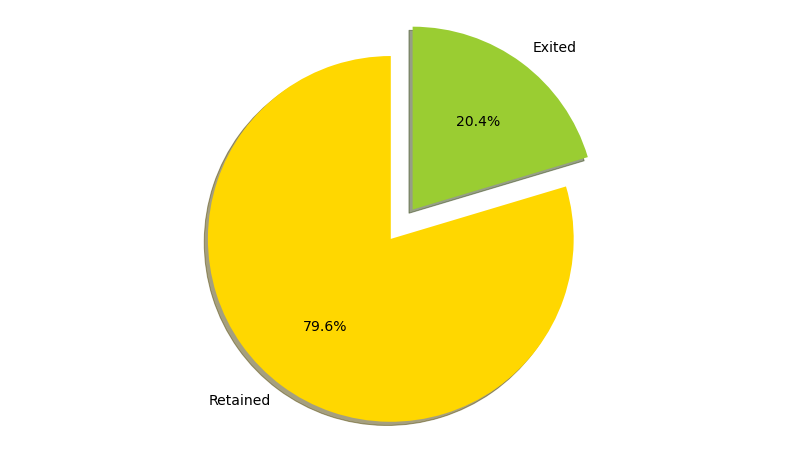

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
label = df['Exited'].value_counts()
colors = ['gold', 'yellowgreen']
judul = ['Retained', 'Exited']
explode = (0.2, 0)
plt.pie(label, explode=explode, labels = judul, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 14})
plt.axis('equal')
plt.show()

In [ ]:
df.describe(include='object')

,Gender
count,10000
unique,2
top,Male
freq,5457


#Encoding Categorical Data

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,Age,CreditScore,EstimatedSalary,HasCrCard,Exited,Gender_Male
0,42,619,101348.88,1,1,0
1,41,608,112542.58,0,0,0
2,42,502,113931.57,1,1,0
3,39,699,93826.63,0,0,0
4,43,850,79084.10,1,0,0


#Exploratory Data Analysis

## Feature vs Target

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

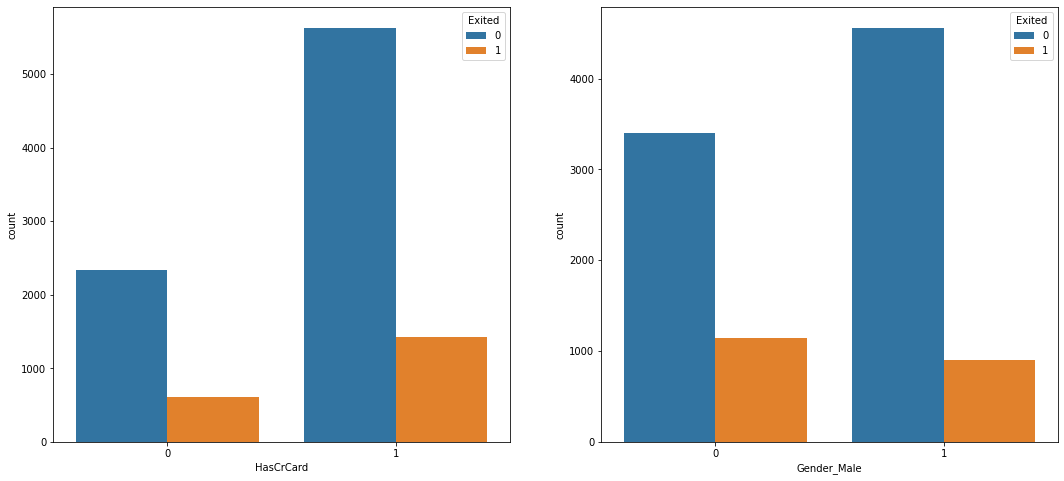

In [ ]:
# We first review the 'Status' relation with categorical variables
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.countplot(x='HasCrCard', hue = 'Exited', data = df, ax=axes[0])
sns.countplot(x='Gender_Male', hue = 'Exited', data = df, ax=axes[1])

Ada beberapa hal yang harus diperhatikan
* Proporsi pelanggan perempuan yang melakukan churning lebih besar dibandingkan pelanggan laki-laki
* Mayoritas pelanggan yang melakukan churn adalah mereka yang memiliki kartu kredit. Mengingat sebagian besar pelanggan memiliki kartu kredit dapat membuktikan bahwa ini hanya kebetulan.


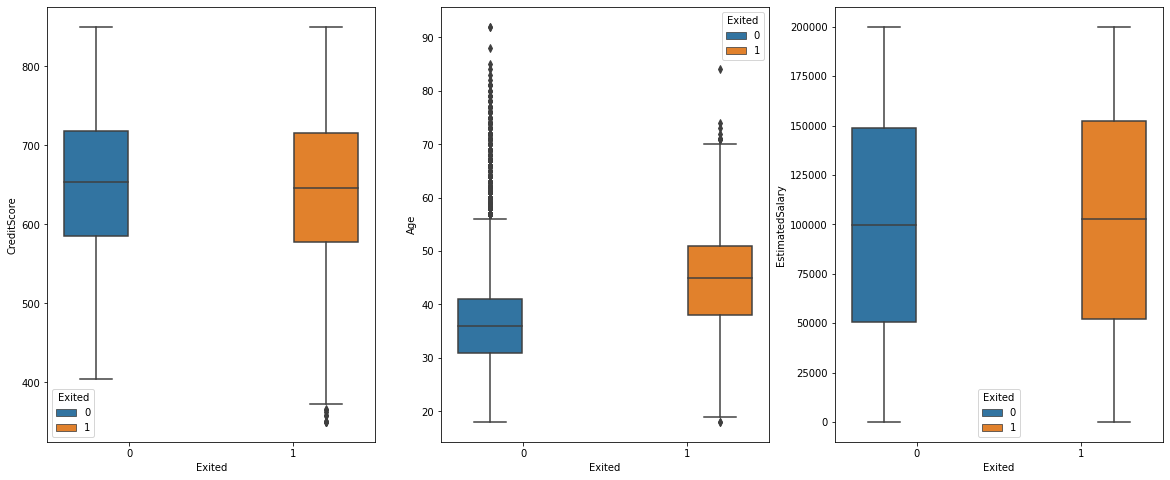

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
sns.boxplot(y='CreditScore', x = 'Exited', hue = 'Exited', data = df, ax=axes[0])
sns.boxplot(y='Age', x = 'Exited', hue = 'Exited', data = df, ax=axes[1])
sns.boxplot(y='EstimatedSalary', x = 'Exited', hue = 'Exited', data = df, ax=axes[2])

Note :
*   Tidak ada perbedaan yang signifikan dalam distribusi kredit score antara pelanggan tetap dan pelanggan yang berhenti.
*   Pelanggan yang lebih tua churning lebih banyak daripada pelanggan yang lebih muda yang mengacu pada perbedaan preferensi layanan dalam kategori usia Bank mungkin perlu meninjau target pasar mereka atau meninjau strategi retensi di antara kelompok usia yang berbeda
*   Gaji tidak berpengaruh signifikan terhadap kemungkinan terjadinya churn.





## Correlation Matrix

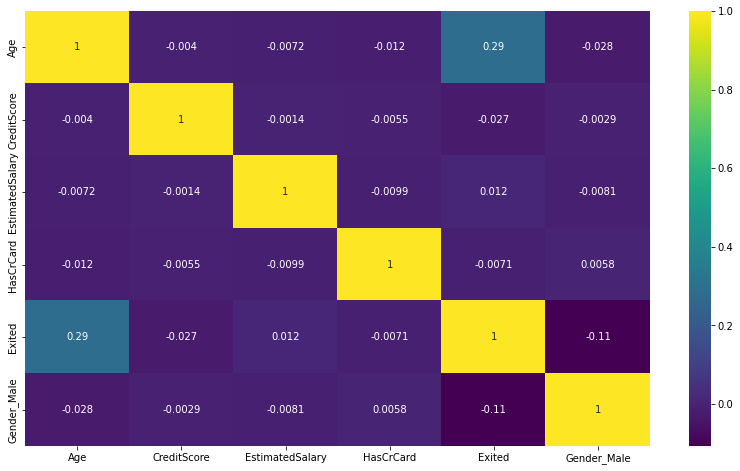

In [ ]:
# Exited correlation matrix
cm = df.corr()
plt.figure(figsize=(14,8))
sns.heatmap(cm, annot=True, cmap = 'viridis')

#Feature Engineering

In [ ]:
df_fe = df.copy()

In [ ]:
# Credit score given age to take into account credit behaviour visavis adult life
df_fe['Credit Score Given Age'] = df_fe["CreditScore"]/(df_fe["Age"])

In [ ]:
# Resulting Data Frame
df_fe.head()

,Age,CreditScore,EstimatedSalary,HasCrCard,Exited,Gender_Male,Credit Score Given Age
0,42,619,101348.88,1,1,0,14.738095
1,41,608,112542.58,0,0,0,14.829268
2,42,502,113931.57,1,1,0,11.952381
3,39,699,93826.63,0,0,0,17.923077
4,43,850,79084.10,1,0,0,19.767442


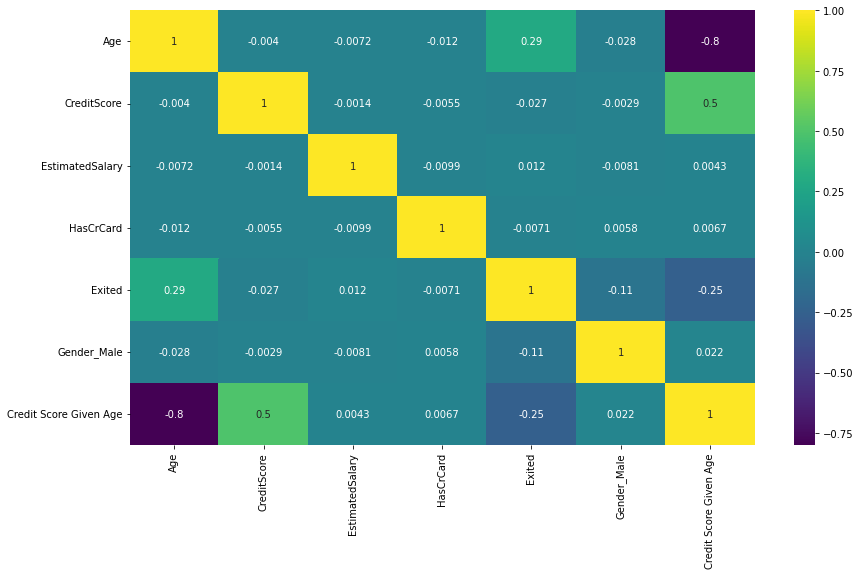

In [ ]:
# Exited correlation matrix
cm = df_fe.corr()
plt.figure(figsize=(14,8))
sns.heatmap(cm, annot=True, cmap = 'viridis')

# Model Fitting and Selection

## Model fitting and selection
For the model fitting
* Gradient Boosting Model
* KNN Model
* Random Forest
* Decision Tree Analysis



In [ ]:
from sklearn.model_selection import train_test_split

# Split Train, test data
X = df_fe.drop(columns=["Exited"]).copy()
y = df_fe["Exited"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42)
print(len(X_train))
print(len(X_test))

7500
2500


In [ ]:
X

,Age,CreditScore,EstimatedSalary,HasCrCard,Gender_Male,Credit Score Given Age
0,42,619,101348.88,1,0,14.738095
1,41,608,112542.58,0,0,14.829268
2,42,502,113931.57,1,0,11.952381
3,39,699,93826.63,0,0,17.923077
4,43,850,79084.10,1,0,19.767442
...,...,...,...,...,...,...
9995,39,771,96270.64,1,1,19.769231
9996,35,516,101699.77,1,1,14.742857
9997,36,709,42085.58,0,0,19.694444
9998,42,772,92888.52,1,1,18.380952


In [ ]:
# Fit models
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

### Gradient Boosting Model

In [ ]:
# Fit GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_GBC = GBC.predict(X_test)
print(classification_report(y_test, y_pred_GBC))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2003
           1       0.57      0.24      0.34       497

    accuracy                           0.81      2500
   macro avg       0.70      0.60      0.61      2500
weighted avg       0.78      0.81      0.78      2500



### KNN Model

In [ ]:
# Fit Support Vector Machine
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      2003
           1       0.24      0.08      0.12       497

    accuracy                           0.77      2500
   macro avg       0.52      0.51      0.49      2500
weighted avg       0.69      0.77      0.72      2500



### Decision Tree Analysis

In [ ]:
# Fit Decision Tree classifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_DT = DT.predict(X_test)
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2003
           1       0.32      0.33      0.33       497

    accuracy                           0.73      2500
   macro avg       0.58      0.58      0.58      2500
weighted avg       0.73      0.73      0.73      2500



### Random Forest Analysis

In [ ]:
# Fit Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2003
           1       0.47      0.24      0.32       497

    accuracy                           0.80      2500
   macro avg       0.65      0.59      0.60      2500
weighted avg       0.76      0.80      0.77      2500



### Menghitung AUC Score

In [ ]:
def get_auc_scores(y_actual, y_pred, y_proba):
    auc_score = roc_auc_score(y_actual, y_pred); 
    fpr_df, tpr_df, _ = roc_curve(y_actual,  y_proba); 
    return (auc_score, fpr_df, tpr_df)

In [ ]:
auc_GBC, fpr_GBC, tpr_GBC = get_auc_scores(y, 
                                           GBC.predict(X),
                                           GBC.predict_proba(X)[:,1])
auc_knn, fpr_knn, tpr_knn = get_auc_scores(y, 
                                           knn.predict(X),
                                           knn.predict_proba(X)[:,1])
auc_DT, fpr_DT, tpr_DT = get_auc_scores(y, 
                                        DT.predict(X),
                                        DT.predict_proba(X)[:,1])
auc_rf, fpr_rf, tpr_rf = get_auc_scores(y, 
                                        rf.predict(X),
                                        rf.predict_proba(X)[:,1])

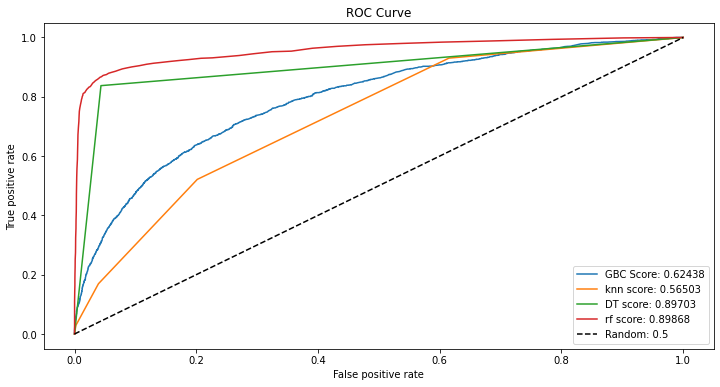

In [ ]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_GBC, tpr_GBC, label = 'GBC Score: ' + str(round(auc_GBC, 5)))
plt.plot(fpr_knn, tpr_knn, label = 'knn score: ' + str(round(auc_knn, 5)))
plt.plot(fpr_DT, tpr_DT, label = 'DT score: ' + str(round(auc_DT, 5)))
plt.plot(fpr_rf, tpr_rf, label = 'rf score: ' + str(round(auc_rf, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

#Handling Imbalance Data

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

0    5960
1    1540
Name: Exited, dtype: int64

In [ ]:
y_smote.value_counts()

1    5960
0    5960
Name: Exited, dtype: int64

### Fit Gradient Boosting Model

In [ ]:
# Fit GradientBoostingClassifier
GBC_smote = GradientBoostingClassifier()
GBC_smote.fit(X_smote, y_smote)

GradientBoostingClassifier()

In [ ]:
y_pred_GBC_smote = GBC_smote.predict(X_test)
print(classification_report(y_test, y_pred_GBC_smote))

              precision    recall  f1-score   support

           0       0.88      0.74      0.80      2003
           1       0.37      0.61      0.46       497

    accuracy                           0.71      2500
   macro avg       0.62      0.67      0.63      2500
weighted avg       0.78      0.71      0.73      2500



### Fit KNN Model

In [ ]:
# Fit KNN model
knn_smote = KNeighborsClassifier()
knn_smote.fit(X_smote, y_smote)

KNeighborsClassifier()

In [ ]:
y_pred_knn_smote = knn_smote.predict(X_test)
print(classification_report(y_test, y_pred_knn_smote))

              precision    recall  f1-score   support

           0       0.80      0.58      0.67      2003
           1       0.20      0.43      0.27       497

    accuracy                           0.55      2500
   macro avg       0.50      0.50      0.47      2500
weighted avg       0.68      0.55      0.59      2500



### Fit Decision Tree Analysis

In [ ]:
# Fit DT
DT_smote = DecisionTreeClassifier()
DT_smote.fit(X_smote, y_smote)

DecisionTreeClassifier()

In [ ]:
y_pred_DT_smote = DT_smote.predict(X_test)
print(classification_report(y_test, y_pred_DT_smote))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76      2003
           1       0.28      0.49      0.36       497

    accuracy                           0.65      2500
   macro avg       0.56      0.59      0.56      2500
weighted avg       0.73      0.65      0.68      2500



### Fit Random Forest Analysis

In [ ]:
# Fit Random Forest classifier
rf_smote = RandomForestClassifier()
rf_smote.fit(X_smote, y_smote)

RandomForestClassifier()

In [ ]:
y_pred_rf_smote = rf_smote.predict(X_test)
print(classification_report(y_test, y_pred_rf_smote))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81      2003
           1       0.35      0.55      0.43       497

    accuracy                           0.71      2500
   macro avg       0.61      0.65      0.62      2500
weighted avg       0.77      0.71      0.73      2500



### Menghitung AUC Score setelah Fit

In [ ]:
auc_GBC_smote, fpr_GBC_smote, tpr_GBC_smote = get_auc_scores(y, 
                                           GBC_smote.predict(X),
                                           GBC_smote.predict_proba(X)[:,1])
auc_knn_smote, fpr_knn_smote, tpr_knn_smote = get_auc_scores(y, 
                                           knn_smote.predict(X),
                                           knn_smote.predict_proba(X)[:,1])
auc_DT_smote, fpr_DT_smote, tpr_DT_smote = get_auc_scores(y, 
                                        DT_smote.predict(X),
                                        DT_smote.predict_proba(X)[:,1])
auc_rf_smote, fpr_rf_smote, tpr_rf_smote = get_auc_scores(y, 
                                        rf_smote.predict(X),
                                        rf_smote.predict_proba(X)[:,1])

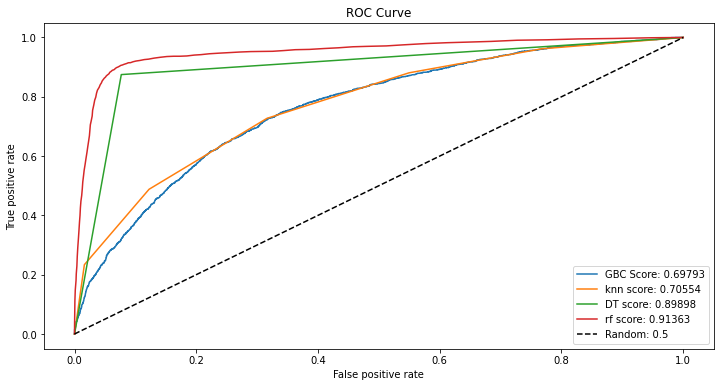

In [ ]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_GBC_smote, tpr_GBC_smote, label = 'GBC Score: ' + str(round(auc_GBC_smote, 5)))
plt.plot(fpr_knn_smote, tpr_knn_smote, label = 'knn score: ' + str(round(auc_knn_smote, 5)))
plt.plot(fpr_DT_smote, tpr_DT_smote, label = 'DT score: ' + str(round(auc_DT_smote, 5)))
plt.plot(fpr_rf_smote, tpr_rf_smote, label = 'rf score: ' + str(round(auc_rf_smote, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

#Feature Importance

<BarContainer object of 6 artists>

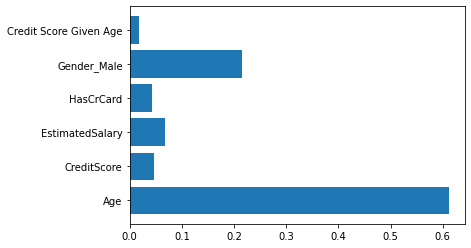

In [ ]:
#Feature Importance GBC
fi = GBC_smote.feature_importances_
col = X_train.columns
plt.barh(col, fi)

<BarContainer object of 6 artists>

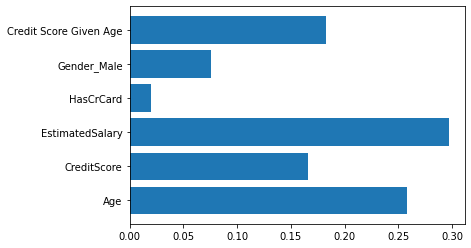

In [ ]:
#Feature Importance Decision Tree
fi = DT_smote.feature_importances_
col = X_train.columns
plt.barh(col, fi)

<BarContainer object of 6 artists>

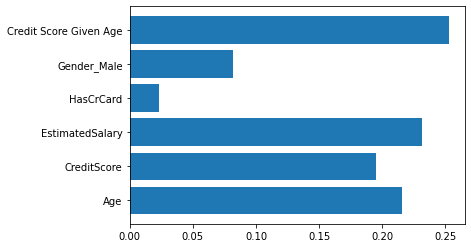

In [ ]:
#Feature Importance Random Forest
fi = rf_smote.feature_importances_
col = X_train.columns
plt.barh(col, fi)

In [ ]:
import joblib

In [ ]:
joblib.dump(rf_smote,'churn_predict_model')

['churn_predict_model']

In [ ]:
model = joblib.load('churn_predict_model')

In [ ]:
X.head()

,Age,CreditScore,EstimatedSalary,HasCrCard,Gender_Male,Credit Score Given Age
0,42,619,101348.88,1,0,14.738095
1,41,608,112542.58,0,0,14.829268
2,42,502,113931.57,1,0,11.952381
3,39,699,93826.63,0,0,17.923077
4,43,850,79084.10,1,0,19.767442


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
model.predict([[41,608,112542.58,0,0,14.829268]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])